In [5]:
# tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper


In [6]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv= ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query Arxiv papers")
print(arxiv.name)

arxiv


In [7]:
# arxiv.invoke("What is the latest research on quantum computing?")

In [8]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki= WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [9]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"] =os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] =os.getenv("GROQ_API_KEY")

In [10]:
# tavily search tools
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\91931\AppData\Local\Temp\ipykernel_2824\1677934665.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [11]:
tavily.invoke("What is ai agent")

[{'title': 'What are AI Agents? Definition, Types, Applications, and Benefits',
  'url': 'https://www.prismetric.com/what-are-ai-agents/',
  'content': 'FAQs\n----\n\n### What is an AI agent?\n\nAn AI agent is an autonomous system that can perform tasks, make decisions, and adapt based on data, goals, and user feedback. It operates independently, handling processes across industries like software development, customer service, healthcare, and more — all without constant human intervention.\n\n### What do AI agents do?',
  'score': 0.9470345},
 {'title': '10 Real-World AI Agent Examples in 2025 - chatbase.co',
  'url': 'https://www.chatbase.co/blog/ai-agent-examples',
  'content': 'An AI agent is a computer program designed to perceive its environment, make decisions, and take actions to achieve specific goals.\n\nUnlike traditional software, AI agents can operate autonomously, learn from experiences, and adapt their behavior over time.\n\nThey combine sensors to gather data, processors

In [12]:
#combine all tools
tools = [arxiv, wiki, tavily]

In [13]:
#intinlizing the llm model
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen-qwq-32b")

In [14]:
llm.invoke("What is ai agent")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is AI agent?" Let me start by breaking down the term. AI stands for Artificial Intelligence, so an AI agent would be an entity that uses AI. But I need to be precise here. An AI agent is a computer system that can perceive its environment through sensors and actuators, and then perform actions to achieve specific goals.\n\nWait, maybe I should explain the components first. Perception and action are key here. So, the agent takes in information from the environment, processes it, and then decides on an action. That\'s the basic cycle: sense, think, act. \n\nI should mention that AI agents can be simple or complex. Simple ones might be like a thermostat that turns heating on or off based on temperature. More complex examples could be chatbots, self-driving cars, or recommendation systems like those on Netflix or Amazon.\n\nAlso, it\'s important to note the types of AI agents. There are different categories based on their proble

In [15]:
llm_with_tools = llm.bind_tools(tools=tools)

In [16]:
llm_with_tools.invoke("What is ai agent")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is ai agent". Let me break this down. They want to understand the concept of an AI agent. First, I need to define what an AI agent is. Since I might not remember all the details, I should use the tools provided to get accurate information.\n\nLooking at the available tools: arxiv, wikipedia, and tavily_search_results_json. Wikipedia could be a good start because it often has clear explanations of concepts. The arXiv function might give research papers, which could be too technical. Tavily\'s search results might provide a variety of sources, but Wikipedia is more likely to have a straightforward definition.\n\nSo I\'ll start with the Wikipedia function. The parameter is "query", so I\'ll set the query to "AI agent" or maybe "Artificial intelligence agent". Let me check if "AI agent" is the exact term used in Wikipedia. If not, maybe "intelligent agent" is the proper term. Hmm, maybe "agent (co

In [17]:
#WORKFLOW
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages



In [18]:
class state(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [19]:
#entire chatbot with langraph
from IPython.display import display, IFrame
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

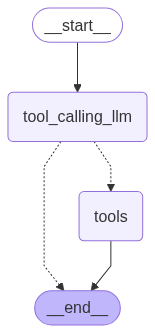

In [20]:
# nood definition
def tool_calling_llm(state: state):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Buid Graph
builder = StateGraph(state)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#edgess

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)

builder.add_edge("tools", END)

graph = builder.compile()

#view graph


from IPython.display import Image, display

# Assuming `graph` is already created and built
display(Image(graph.get_graph().draw_mermaid_png()))


In [24]:
messages = graph.invoke({"messages":"in 2025 which fild choose cse or AI ml?"}) 
for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

in 2025 which fild choose cse or AI ml?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fkgeq9zxj)
 Call ID: fkgeq9zxj
  Args:
    query: 2023-2025 job market trends for Computer Science Engineering (CSE) vs Artificial Intelligence/Machine Learning (AI/ML) career opportunities salary growth
  arxiv (2hxgnpqch)
 Call ID: 2hxgnpqch
  Args:
    query: Recent advancements in AI/ML and their impact on core computer science disciplines
  wikipedia (ahxv6ek06)
 Call ID: ahxv6ek06
  Args:
    query: Artificial intelligence economic impact
  wikipedia (h4qy7wqca)
 Call ID: h4qy7wqca
  Args:
    query: Computer science engineering career paths
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "CS vs AIML in 2025: Future Trends, Salaries, and Opportunities", "url": "h